In [17]:
import pickle
folder_path = 'output/'
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import loglaplace,chi2
from labellines import *
import numpy as np

In [18]:

# Define the file path where the data is saved
file_path = f'{folder_path}overleaf/data/canvas.pkl'

# Load the data from the file using pickle
with open(file_path, 'rb') as f:
    data_loaded = pickle.load(f)

# Now you can access the dictionaries in the list data_loaded

reject_rates_list, metrics_results_list_global, experiment_ids_list, dataset, folder_path, heuristic_cutoff_list,datasets = data_loaded

# reject_rates_list, metrics_results_list_global, experiment_ids_list, heuristic_cutoff_list,datasets = data_loaded


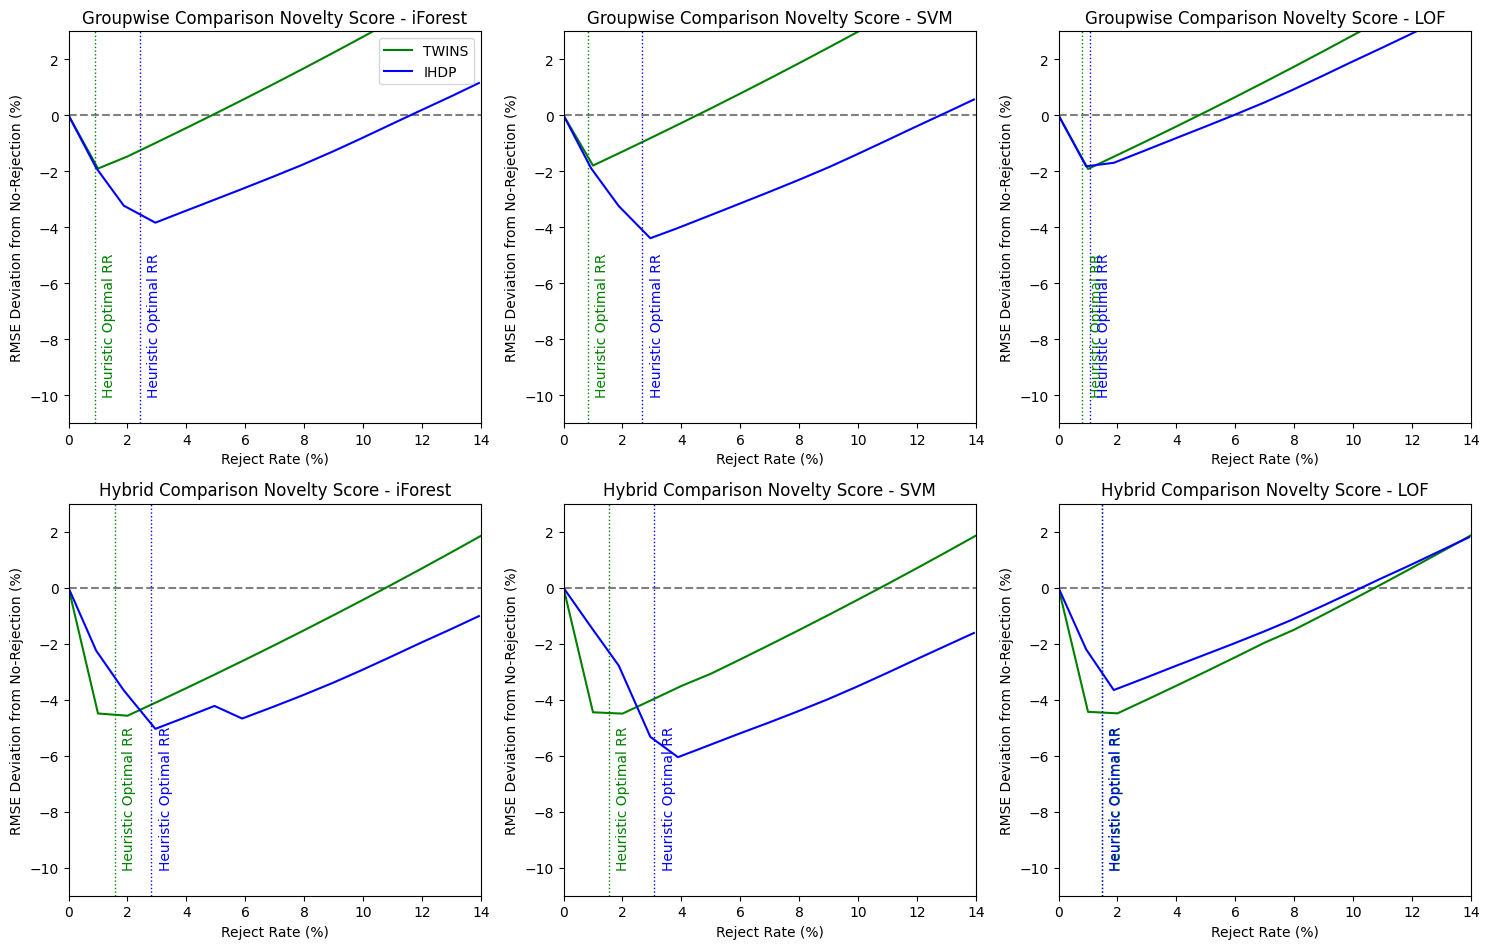

In [38]:
metric_list = metrics_results_list_global
xlabel = 'Reject Rate (%)'
ylabel = 'RMSE Deviation from No-Rejection (%)'
folder = 'rmse'
y_min = -11
y_max =  3
title = f'Impact of Rejection on the RMSE of the TE'
metric_name = "RMSE Change (%)"

techniques = ['iForest', 'SVM', 'LOF', 'iForest', 'SVM', 'LOF', 'iForest', 'SVM', 'LOF', 'RFQR']
scores = ['Singular Comparison Novelty Score', 'Singular Comparison Novelty Score', 'Singular Comparison Novelty Score','Groupwise Comparison Novelty Score', 'Groupwise Comparison Novelty Score', 'Groupwise Comparison Novelty Score','Hybrid Comparison Novelty Score', 'Hybrid Comparison Novelty Score', 'Hybrid Comparison Novelty Score','Ambiguity Score']

plt.figure(figsize=(15, 10))  # Increase the figure size for a 3x2 grid

# Create a 3x3 grid of subplots
for i in range(4, 10):
    plt.subplot(2, 3, i-3)
    plt.xlim(0, 14)  # Set x-axis range from 0 to 6
    plt.ylim(y_min, y_max)  # Set x-axis range from 0 to 6
    # plt.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
    plt.axhline(y=0, color='gray', linestyle='--')

    for dataset in datasets:
        # Plot the graph for the green color
        if dataset=="TWINSC":
            color = "green"
            dataset_name="TWINS"
        else:
            color = "blue"
            dataset_name="IHDP"

        plt.plot([rate * 100 for rate in reject_rates_list[dataset][i]], [result.get(metric_name, None) for result in metric_list[dataset][i]], color=color, label=f"{dataset_name}")

        # Check if heuristic cutoff is less than 15
        if heuristic_cutoff_list[dataset][i] * 100 < 15:
            plt.axvline(x=heuristic_cutoff_list[dataset][i]*100, color=color, linestyle=':', linewidth=1)
            plt.text(heuristic_cutoff_list[dataset][i]*100 + 0.25, y_min+(y_max-y_min)*0.25, 'Heuristic Optimal RR', rotation=90, color=color, verticalalignment='center')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # plt.title(f'Experiment {experiment_ids_list[dataset][i]}')
    plt.title(f'{scores[i-1]} - {techniques[i-1]}')
    if i == 4:
        plt.legend()

# plt.suptitle(title, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout

# Save the combined plot as an image
plt.savefig(f"{folder_path}overleaf/{folder}/rmserejectcurvenovelty.pdf")
# plt.close()
# plt.cla()

# plt.figure(figsize=(15, 15))  # Increase the figure size for a 2x1 grid
# # Create a 2x1 grid of subplots
# x = 0
# for i in [5,6,7,10]:
#     x += 1
#     plt.subplot(2, 2, x)  # Configure subplot as 2x1

#     plt.ylim(y_min, y_max)  # Set x-axis range from 0 to 6
#     plt.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
    
#     for dataset in datasets:
#         # Plot the graph for the green color
#         if dataset=="TWINSC":
#             color = "green"
#         else:
#             color = "blue"
#         plt.plot([rate * 100 for rate in reject_rates_list[dataset][i]], [result.get(metric_name, None) for result in metric_list[dataset][i]], color=color, label=f"{dataset}")

#         # Check if heuristic cutoff is less than 15
#         if heuristic_cutoff_list[dataset][i] * 100 < 15:
#             plt.axvline(x=heuristic_cutoff_list[dataset][i]*100, color=color, linestyle=':', linewidth=1)
#             plt.text(heuristic_cutoff_list[dataset][i]*100 + 0.25, -4, 'Heuristic Optimal RR', rotation=90, color=color, verticalalignment='center')

#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
    
#     plt.title(f'Experiment {experiment_ids_list[dataset][i]}')
#     # plt.grid(True)
#     plt.legend()

# plt.suptitle(title, fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout

# # Save the combined plot as an image
# plt.savefig(f"{folder_path}overleaf/{folder}/Nov_vs_Amb.pdf")


In [ ]:
# Make a graph that plots on the x-axis the novelty scores and on the y-axis the RMSE.

# plt.figure(figsize=(15, 15))  # Increase the figure size for a 2x1 grid

